In [113]:
%load_ext autoreload
%autoreload 2

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import numpy as np

import data_utils
import plots
import truncated_normal, normal
import deltas
import projection


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


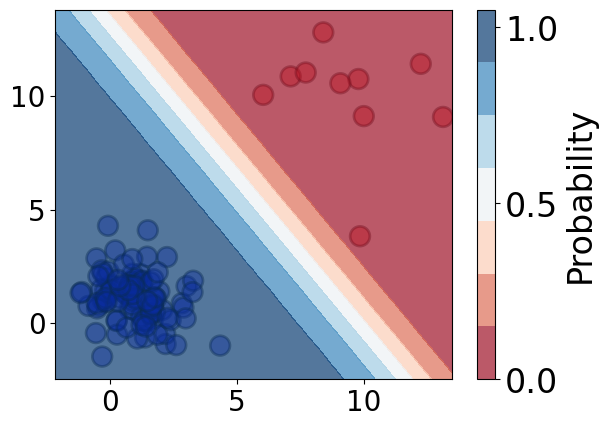

In [114]:
m1 = [1, 1]
m2 = [10, 10]
cov1 = [[1, 0], [0, 1]]
cov2 = [[5, 0], [0, 5]]
N1 = 100
N2 = 10

data = normal.get_two_classes(means=[m1, m2], 
                              covs=[cov1, cov2],
                              num_samples=[N1, N2])
scaler = data_utils.normaliser(data)
# data = scaler(data)

clf = SVC(random_state=0, probability=True,
          kernel='linear').fit(data['X'], data['y'])

clf = LogisticRegression().fit(data['X'], data['y'])

ax, _ = plots._get_axes(None)
plots.plot_classes(data, ax=ax)
plots.plot_decision_boundary(clf, data, ax=ax)
plots.plt.show()

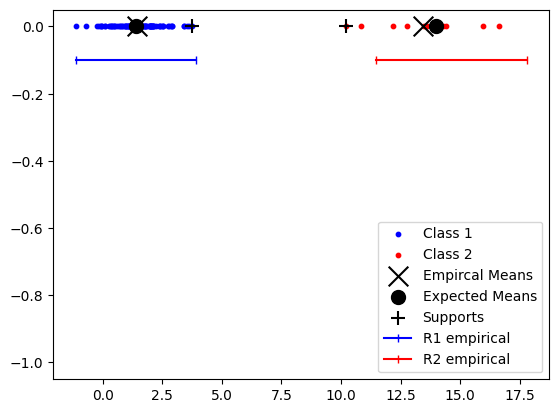

In [115]:
# get projections
import radius
proj_data = projection.from_clf(data, clf, supports=True)
proj_means = projection.from_clf({'X': np.array([m1, m2]), 'y': [0, 1]}, clf)

# Empircal M
M_emp = np.abs(proj_data['supports'][1]-proj_data['supports'][0]).squeeze()

# get Rs
R_sup = radius.supremum(data['X'])
# R_sup_proj = radius.supremum(proj_data['X'])
R1_emp = radius.supremum(proj_data['X1'], proj_means['X1'])
R2_emp = radius.supremum(proj_data['X2'], proj_means['X2'])

# plot
ax = plots.plot_projection(proj_data, proj_means, R1_emp, R2_emp)

In [116]:
# Optimise Eq. 6 using the constraint eq. 9
from scipy.optimize import minimize

c1 = 1
c2 = 1
bounds = [(0, 1)]
delta1_init = (0.5)
delta1_init = (np.random.uniform())
res = minimize(deltas.loss_one_delta, 
               delta1_init,
               (c1, c2, N1, N2, M_emp, R_sup), 
               # method='CG', 
               bounds=bounds)
delta1 = res.x
delta2 = deltas.delta2_given_delta1(N1, N2, M_emp, delta1, R_sup)
print(f'delta1 : {delta1} \ndelta2: {delta2}')

delta1 : [0.] 
delta2: [0.]


/home/matt/projects/linear_confidence/deltas.py:23: RuntimeWarning: divide by zero encountered in divide


In [117]:
# calculate each R upper bound
import radius
R1 = radius.R_upper_bound(R1_emp, R_sup, N1, delta1)
R2 = radius.R_upper_bound(R2_emp, R_sup, N2, delta2)
print(f'R1 : {R1} \nR2: {R2}')

R1 : [inf] 
R2: [inf]


/home/matt/projects/linear_confidence/radius.py:5: RuntimeWarning: divide by zero encountered in divide
  R_expt = R_emp + (2*(R_sup/np.sqrt(N))) * (2+(np.sqrt(2*np.log(1/delta))))
